# Fouille de données : data challenge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

Dimensions du jeu de données (spectres) d'entraînement et de test :

In [2]:
# Entraînement
spectra_train = pd.read_csv("data/spectra-train.csv", sep=";", header=None)
n_spectra_train = spectra_train.shape[0]
p = spectra_train.shape[1]

# Test
spectra_test = pd.read_csv("data/spectra-test.csv", sep=";", header=None)
n_spectra_test = spectra_test.shape[0]

# Caractéristiques
print("Dimension jeu de données (spectres) d'entraînement : {} x {}".format(n_spectra_train, p))
print("Dimension jeu de données (spectres) de test : {} x {}".format(n_spectra_test, p))

Dimension jeu de données (spectres) d'entraînement : 3114 x 627
Dimension jeu de données (spectres) de test : 1197 x 627


In [3]:
meta_train = pd.read_csv("data/meta-train.csv", sep=";", header=0)
species_train = np.array(meta_train.loc[:, 'species'])
strain_train = np.array(meta_train.loc[:, 'strain'])
species_names = np.unique(species_train)
num_species = len(species_names)
print("{} catégories: {}".format(num_species, species_names))

42 catégories: ['sp_1' 'sp_10' 'sp_11' 'sp_12' 'sp_13' 'sp_14' 'sp_15' 'sp_16' 'sp_17'
 'sp_18' 'sp_19' 'sp_2' 'sp_20' 'sp_21' 'sp_22' 'sp_23' 'sp_24' 'sp_25'
 'sp_26' 'sp_27' 'sp_28' 'sp_29' 'sp_3' 'sp_30' 'sp_31' 'sp_32' 'sp_33'
 'sp_34' 'sp_35' 'sp_36' 'sp_37' 'sp_38' 'sp_39' 'sp_4' 'sp_40' 'sp_41'
 'sp_42' 'sp_5' 'sp_6' 'sp_7' 'sp_8' 'sp_9']


Encodage de chaque espèce avec `LabelEncoder` :

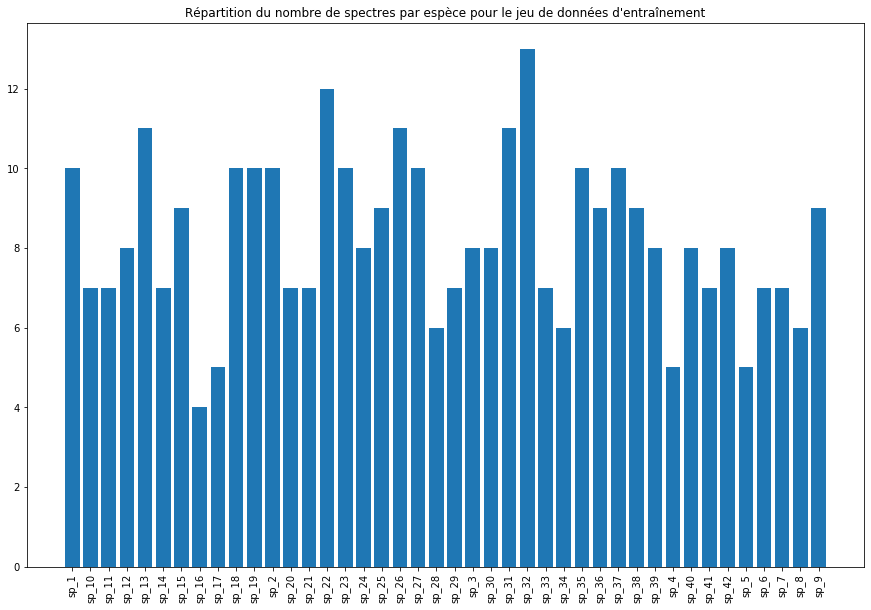

In [4]:
le = LabelEncoder()
y_train = le.fit_transform(species_train)
plt.figure(figsize=(15, 10))
plt.bar(species_names, np.bincount(y_train)/9)
plt.title("Répartition du nombre de spectres par espèce pour le jeu de données d'entraînement")
plt.xticks(rotation=90)
plt.show()

## Approche naïf avec 4 espèces

On ne prend pas en compte les souches et on essaie de prédire pour chaque spectre indépendemment l'espèce, et on choisit l'espèce prédite majoritaire par souche.

In [74]:
df = pd.concat([spectra_train, meta_train], axis=1)
df = df.loc[df['species'].isin(["sp_1", "sp_2", "sp_3", "sp_4", "sp_5", "sp_6", "sp_7", "sp_8", "sp_9", "sp_10", "sp_11", "sp_12"])]
X = df.drop(columns=["strain","species"])
y = df.loc[:, "species"]
y_names = np.unique(y)
n = X.shape[0]
p = X.shape[1]

# Caractéristiques
print("Dimension jeu de données (spectres) d'entraînement : {} x {}".format(n, p))

Dimension jeu de données (spectres) d'entraînement : 801 x 627


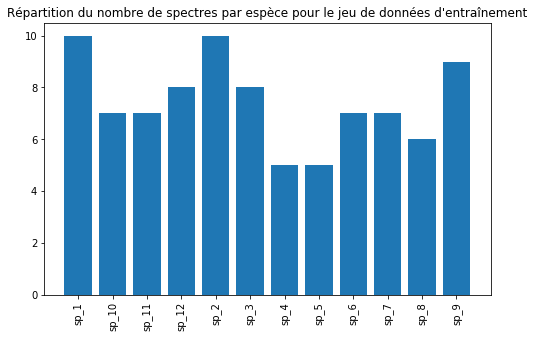

In [75]:
le = LabelEncoder()
y = le.fit_transform(y)
plt.figure(figsize=(8, 5))
plt.bar(y_names, np.bincount(y)/9)
plt.title("Répartition du nombre de spectres par espèce pour le jeu de données d'entraînement")
plt.xticks(rotation=90)
plt.show()

ACP sur les 4 classes :

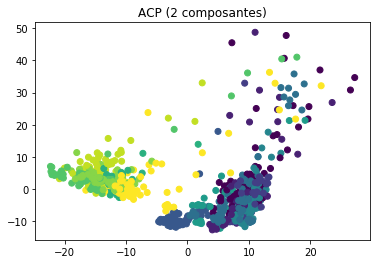

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_std = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_comp = pca.fit_transform(X_std)

plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y)
plt.title("ACP (2 composantes)")
plt.show()

### Random Forest

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

n_components_grid = [11, 13, 15]
n_estimators_grid = [50, 100, 200, 300, 400]
max_leaf_nodes_grid = [None, 10, 20, 50, 100]
max_features_grid = ['auto', 'sqrt', 'log2']

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('rf', RandomForestClassifier())
])

param_grid = [
    {
        'pca__n_components': n_components_grid,
        'rf__n_estimators': n_estimators_grid,
        'rf__max_features': max_features_grid,
        'rf__max_leaf_nodes': max_leaf_nodes_grid
    },
]

grid_search = GridSearchCV(pipe, param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X, y)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[CV] pca__n_components=11, rf__max_features=auto, rf__max_leaf_nodes=None, rf__n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  pca__n_components=11, rf__max_features=auto, rf__max_leaf_nodes=None, rf__n_estimators=50, total=   0.2s
[CV] pca__n_components=11, rf__max_features=auto, rf__max_leaf_nodes=None, rf__n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  pca__n_components=11, rf__max_features=auto, rf__max_leaf_nodes=None, rf__n_estimators=50, total=   0.2s
[CV] pca__n_components=11, rf__max_features=auto, rf__max_leaf_nodes=None, rf__n_estimators=50 
[CV]  pca__n_components=11, rf__max_features=auto, rf__max_leaf_nodes=None, rf__n_estimators=50, total=   0.2s
[CV] pca__n_components=11, rf__max_features=auto, rf__max_leaf_nodes=None, rf__n_estimators=50 
[CV]  pca__n_components=11, rf__max_features=auto, rf__max_leaf_nodes=None, rf__n_estimators=50, total=   0.2s
[CV] pca__n_components=11, rf__max_features=auto, rf__max_leaf_nodes=None, rf__n_estimators=50 
[CV]  pca__n_components=11, rf__max_features=auto, rf__max_leaf_nodes=None, rf__n_estimators=50, total=   0.2s
[CV] pca__n_components=11, rf__max_features=auto, rf__max_leaf_nodes=None, rf__n_estimators=100 
[CV]  pca__n_components=11, rf__max_features=auto, rf__max_leaf_nodes=None, rf__n_estimators=100, total=   0.3s
[CV] pca__n_components=11, rf__max_features=auto, rf__max_l

KeyboardInterrupt: 

In [78]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'knc__n_neighbors': 7, 'pca__n_components': 78}
0.7815230961298377


### K-plus proches voisins

In [77]:
from sklearn.neighbors import KNeighborsClassifier

n_components_grid = np.arange(60, 80, 2)
n_neighbors_grid = np.arange(1, 50, 2)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('knc', KNeighborsClassifier())
])

param_grid = [
    {
        'pca__n_components': n_components_grid,
        'knc__n_neighbors': n_neighbors_grid,
    },
]

grid_search = GridSearchCV(pipe, param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X, y)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed:  1.8min finished
/home/soheil/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('knc',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                            

## Approche naïf avec 4 espèces

In [155]:
df = pd.concat([spectra_train, meta_train], axis=1)
df = df.groupby(['strain', 'species'])
X = df.median()

In [156]:
y = X.index.get_level_values('species')
y_names = np.unique(y)
n = X.shape[0]
p = X.shape[1]

# Caractéristiques
print("Dimension jeu de données (spectres) d'entraînement : {} x {}".format(n, p))

Dimension jeu de données (spectres) d'entraînement : 346 x 627


[ 4 26 32 24 24 34 27 31  3 31 25 25 25 25 25 25 29 29  3 31 31 31 34 34
 25 25  4 36 36 29 32 32 28 28 28 28 28 28 28  4 25  4  4 32 35 35 32 27
 26 28 34  3  4 32 25 25 28 28 32 34 34 34 34 35 35 35 26 25 27 27 36 36
 36 29 26 27 26 24 24 26 26 29  3 36 36 31 29 29 29 29 31 31 36 35 24 24
 24  4 31 27 24 24 24 33  4  4 25 35 32  3  3  4  4  3  3 24 11 14 14 14
 21 21 23 23  0  1  1  5  1 18 18 18  5 23 30  9  9  9  9  2  2 23  2  2
 23  2 14 14 30 13  0  0  0  0  5  7 15 15 15  6 15 12 19 16 19  6 16 16
  6 21 21 21 21 11 18 19 30  0 22 30 33 18 18 18 18 14 17 12  6 16 16 16
 16 16 23 22 22 22 22 33 33 22 11 11 12 18  0 15  0 14 15 30 15 30  1 14
 18 30  7 14  7 14 30  7 30 17 17 17 12 12 13 17 13 14  0 22  0  1 13 19
 20 12 23 15 30 13 13 20 20  6 11 22 14  1 18 20 12  9  9  6  6  6 19 19
  6 19  9 33  5 19 15 19 19 20  1 15 20  5 13 21 23 17 17 17 17 11 11 11
 11 11 39 37 37 37 40 40 41 41 41 39 40 41 40 40 39 39 37 37 38 38 41 41
 41 38 38 38 41 39 39 38 39 40 38 41 10 10 10 10 10

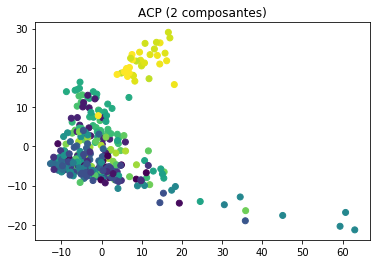

In [157]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

le = LabelEncoder()
y = le.fit_transform(y)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_comp = pca.fit_transform(X_std)

print(y)
print(y_names)

plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y)
plt.title("ACP (2 composantes)")
plt.show()

In [161]:
from sklearn.neighbors import KNeighborsClassifier

n_components_grid = np.arange(2, 200, 2)
n_neighbors_grid = [1]

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('knc', KNeighborsClassifier())
])

param_grid = [
    {
        'pca__n_components': n_components_grid,
        'knc__n_neighbors': n_neighbors_grid,
    },
]

grid_search = GridSearchCV(pipe, param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X, y)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


/home/soheil/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 495 out of 495 | elapsed:   39.0s finished
/home/soheil/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('knc',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                            

In [162]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'knc__n_neighbors': 1, 'pca__n_components': 150}
0.7052023121387283


In [163]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

n_components_grid = [11, 13, 15]
n_estimators_grid = [50, 100, 200, 300, 400]
max_leaf_nodes_grid = [None, 10, 20, 50, 100]
max_features_grid = ['auto', 'sqrt', 'log2']

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('rf', RandomForestClassifier())
])

param_grid = [
    {
        'pca__n_components': n_components_grid,
        'rf__n_estimators': n_estimators_grid,
        'rf__max_features': max_features_grid,
        'rf__max_leaf_nodes': max_leaf_nodes_grid
    },
]

grid_search = GridSearchCV(pipe, param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X, y)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


/home/soheil/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1125 out of 1125 | elapsed:  3.3min finished
/home/soheil/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('rf',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight=None,
                                                      

In [164]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'pca__n_components': 15, 'rf__max_features': 'sqrt', 'rf__max_leaf_nodes': 100, 'rf__n_estimators': 300}
0.6791907514450867
